# CIML Metrics Report

In this notebook we will have a deeper look at the metrics of our experiments using the confusion matrix and the classification report and apply them to the CIML trained models with the best accuracy obtained for binary and multiple classification.

First we will load the data and define the functions to generate the reports and then analyse the resulting reports on the CIML trained models for binary and multiple classification .

## Data load and preparation

We fist import the libraries needed to gather the results from CIML training, generate and plot the confusion matrix and generate metrics report.

In [1]:
from ciml import gather_results
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report
from collections import Counter

We now define a function to load the data from the given experiment and prepare it so that the confusion matrix and metric report can be generated.
<br>For the model for binary classification the classes are 'passed' and 'failed'.
<br>For the model for multiple classification we have seven cloud operator: 'ovh','rax','vexxhost','inap-mtl01','fortnebula-regionone','limestone-regionone','packethost-us-west-1'

In [28]:
def data_preparation(data_path, dataset, experiment, classification):
    file_name = 'prediction_' + dataset
    #print("file name: ", file_name)
    #Prediction_Data consists of EID, Pred, Class
    prediction_data = gather_results.load_data_json(dataset, file_name,
        sub_folder=experiment, data_path=data_path)
    #print("prediction data: ", prediction_data)
    examples_id = [x[0] for x in prediction_data]
    #print("examples ids: ", examples_id)
    pred_classes_norm = [x[1]['classes'] for x in prediction_data]
    #print("prediction classes norm: ", pred_classes_norm)
    labels = [x[2] for x in prediction_data]
    #print("labels: ", labels)
    #Choose class_names based on classification problem
    if classification == 'multi':
        pred_classes = [x[1]['classes'] for x in prediction_data]
        pred_classes_norm = [x[0][:10] for x in pred_classes]
        labels_norm = [x[:10] for x in labels]
        class_names = ['ovh','rax','vexxhost','inap-mtl01','fortnebula-regionone','limestone-regionone','packethost-us-west-1']
        class_names_norm = [x[:10] for x in class_names]
    elif classification == 'binary':
        pred_classes = [int(x[1]['classes'][0]) for x in prediction_data]
        pred_classes_norm = pred_classes
        labels_norm = labels
        class_names = [0,1]
        class_names_norm = ['passed','failed']
    else:
        return print('Please define classification as `multi` or `binary` based on the model used.')

    return labels_norm,pred_classes_norm,class_names_norm,class_names;

## Confusion Matrix

We generate the confusion matrix using sklearn and plot it using the mlxtend library.
<br>Using the confusion matrix we can better visualise the performance of the classification algorithm.

In [3]:
#Generates confusion matrix
def confusion(labels_norm,pred_classes_norm,class_names_norm):
    return confusion_matrix(labels_norm,pred_classes_norm,labels=class_names_norm)

In [4]:
#Plots confusion matrix
def confusion_plot(confusion, class_names_norm):
    fig, ax = plot_confusion_matrix(conf_mat=confusion,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                figsize=(8,8),
                                class_names=class_names_norm)
    return plt.show()

## Metrics report

We generate and print metrics report using sklearn to have a deeper view at the following metrics:
* $Precision = \frac{TP}{TP + FP}$
<br>Precision is intuitively the ability of the classifier not to label as positive a sample that is negative. <br>Precision is specially useful when the cost of FP is high.
<br>

* $Recall = \frac{TP}{TP + FN}$
<br>Recall is intuitively the ability of the classifier to find all the positive samples.
<br>Recall is specially useful when the cost of a FN is high.
<br>

* $F1\ score = 2*\frac{Precision * Recall}{Precision + Recall}$
<br>The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
<br>In our experiment we consider recall and precision equally important and use beta=1, i.e. we make use of the F1 score.

In the classification report provided by sklearn, the information `support` is given too. The support is the number of occurrences of each class in y_true.

In [5]:
def report(labels_norm, pred_classes_norm):
    rep = classification_report(labels_norm, pred_classes_norm)
    return print(rep)

## CIML Metrics Report on Binary Classification

From the supervised learning experiments on binary data classification on CIML data, the best results were obtained for the following experiment:
* Two Classes: CI job `passed` or `failed`
* Features from dstat data: User CPU `usr` and Average System Load `1m`.
* Data resolution: 1 minute
* Model hyperparameters:
    * NW topology: DNN with 3 hidden layers and 100 units per layer.
    * Activation function: RELU.
    * Output layer: Sigmoid.
    * Initial learning rate: 0.05
    * Optimiser: Adagrad

In [29]:
data_path = '/git/github.com/kwulffert/ciml_experiments/data'
dataset = 'usr_used_1m-1min-status'
experiment = 'dnn-3x100-1000epochs-bs128'
file_name = 'prediction_' + dataset

In [30]:
labels_norm,pred_classes_norm,class_names_norm,class_names = data_preparation(data_path, dataset, experiment, classification="binary")

In [31]:
cf = confusion(labels_norm,pred_classes_norm,class_names)

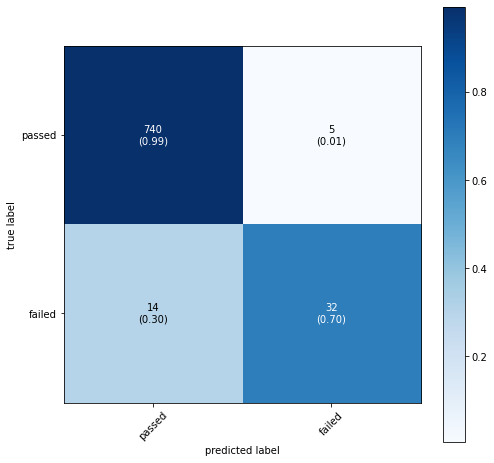

In [32]:
confusion_plot(cf, class_names_norm)

In [33]:
report(labels_norm, pred_classes_norm)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       745
           1       0.86      0.70      0.77        46

    accuracy                           0.98       791
   macro avg       0.92      0.84      0.88       791
weighted avg       0.97      0.98      0.97       791



All metrics including accuracy and the f1-score are high. Recall and f1-score values for prediction of failed CI jobs is lower as their samples have less support in the dataset.

## CIML Metrics Report on Multiple Classification

From the supervised learning experiments on multiple data classification on CIML data, the best results were obtained for the following experiment:
* Features from dstat data: User CPU `usr` and Average System Load `1m`.
* Data resolution: 1 minute
* Classes reduction: cloud providers with several regions were mapped to a single class.
* Model hyperparameters:
    * NW topology: DNN with 3 hidden layers and 100 units per layer.
    * Activation function: RELU.
    * Output layer: Sigmoid.
    * Initial learning rate: 0.05
    * Optimiser: Adagrad

In [34]:
data_path = '/git/github.com/kwulffert/ciml_experiments/data'
dataset = 'usr_1m-1min-node_provider'
experiment = 'dnn-3x100-500epochs-bs128'
file_name = 'prediction_' + dataset

In [35]:
labels_norm,pred_classes_norm,class_names_norm,class_names = data_preparation(data_path, dataset, experiment, classification="multi")

In [37]:
cf = confusion(labels_norm,pred_classes_norm,class_names_norm)

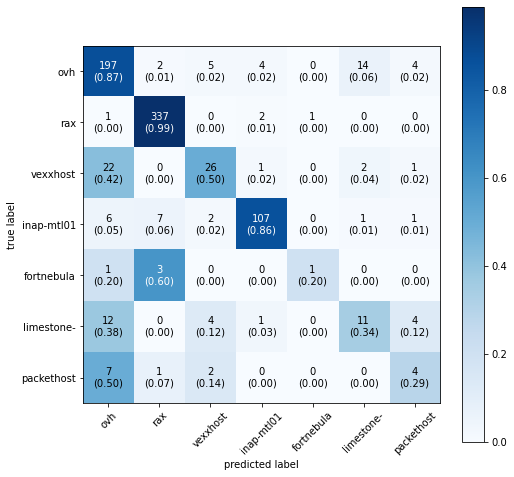

In [38]:
confusion_plot(cf, class_names_norm)

Cloud providers with highest support in the dataset were classified with more accuracy.
<br>The fact that a cloud provider can be classified using only system use information indicates that each could provider has a kind of signature in the use of the system and resources allocation.

In [26]:
report(labels_norm, pred_classes_norm)

              precision    recall  f1-score   support

  fortnebula       0.50      0.20      0.29         5
  inap-mtl01       0.93      0.86      0.90       124
  limestone-       0.39      0.34      0.37        32
         ovh       0.80      0.87      0.83       226
  packethost       0.29      0.29      0.29        14
         rax       0.96      0.99      0.98       341
    vexxhost       0.67      0.50      0.57        52

    accuracy                           0.86       794
   macro avg       0.65      0.58      0.60       794
weighted avg       0.85      0.86      0.86       794

